In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
wine = pd.read_csv('winequality-white.csv', sep = ';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### One dimensional Analysis

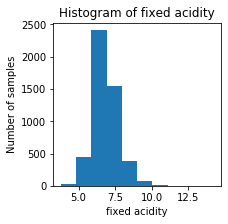

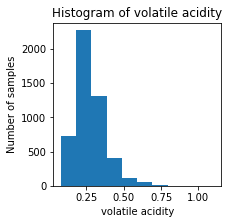

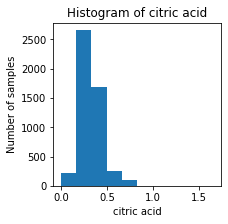

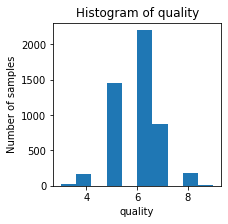

In [6]:
def plot_histogram(wine, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(3,3)) # define the area plotting
        ax = fig.gca() # define axis  
        wine[col].plot.hist(ax = ax, bins = bins)
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of samples')# Set text for y axis
        plt.show()
        
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'quality']
plot_histogram(wine, cols)

Note: Pay attention to the right-skewed or left-skewed distribuitions. It may difficult the model capacity of generelize. Example: The histogram of citric acid. 

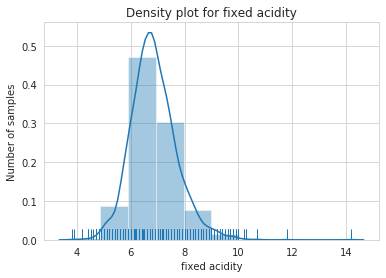

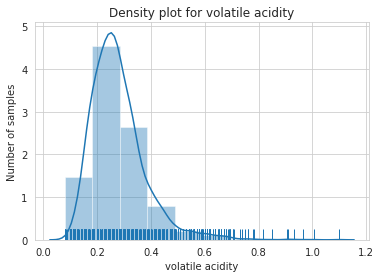

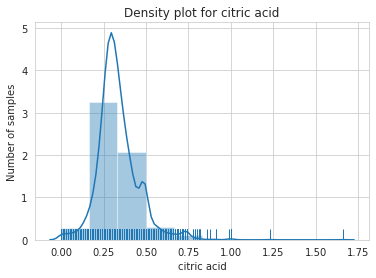

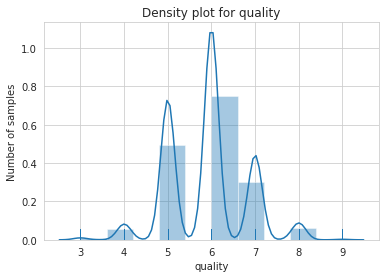

In [7]:
def density_plot(wine, cols, bins = 10, hist = True):
    for col in cols:
        
        sns.set_style("whitegrid")
        sns.distplot(wine[col], bins = bins, rug = True, hist = hist)
        plt.title('Density plot for ' + col)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of samples')# Set text for y axis
        plt.show()


cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'quality']
density_plot(wine,cols)


### Two Dimensional Analysis

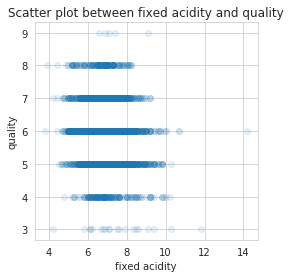

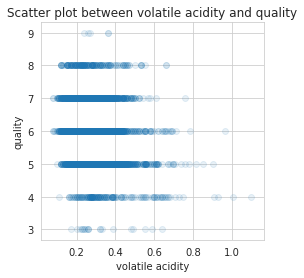

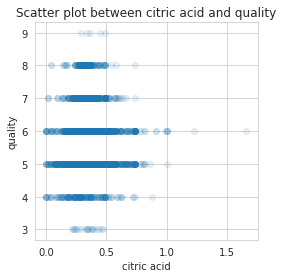

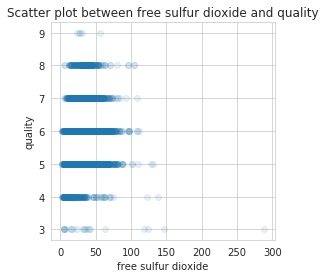

In [8]:
def scatter_plot(wine, cols, target_variable, alpha = 0.1):
    
    for col in cols:
        fig = plt.figure(figsize=(4,4)) # define the area plotting
        ax = fig.gca() # define axis  
        ax.scatter(wine[col], wine[target_variable], alpha = alpha)
        ax.set_title('Scatter plot between ' + col + ' and ' + target_variable) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(target_variable)# Set text for y axis
        plt.show()

cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'free sulfur dioxide']
scatter_plot(wine, cols, 'quality')

Note: This type of plot wasn't the best choice. Why? Overplotting!! In that case, even adjusting the alpha parameter (transparency) wasn't enough. 

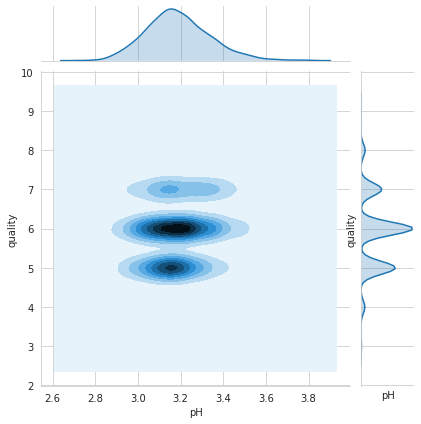

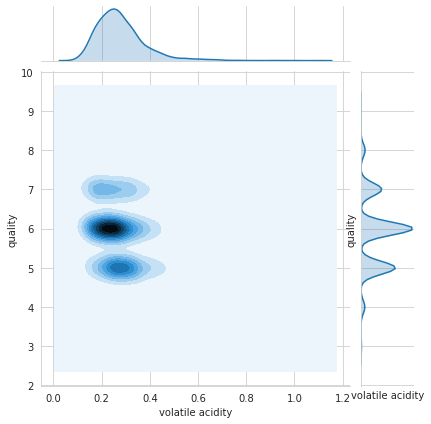

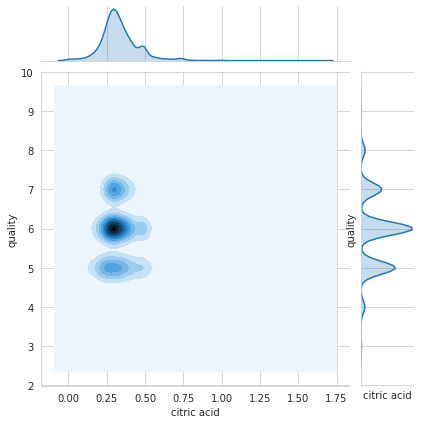

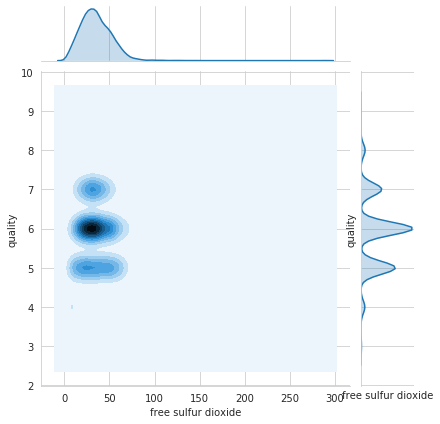

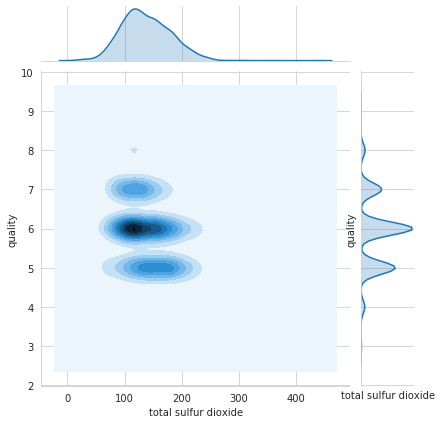

In [9]:
def joint(wine, cols, target_variable, kind = "kde"):
    for col in cols:
    
        sns.jointplot(x=col, y= wine[target_variable], data=wine, kind= kind);
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('quality')# Set text for y axis
        plt.show()

cols = ['pH', 'volatile acidity', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide']
joint(wine, cols, 'quality')


It's clearly that most of the samples has quality 6 as label. 

The hex version from the joint plots:
    
    
    

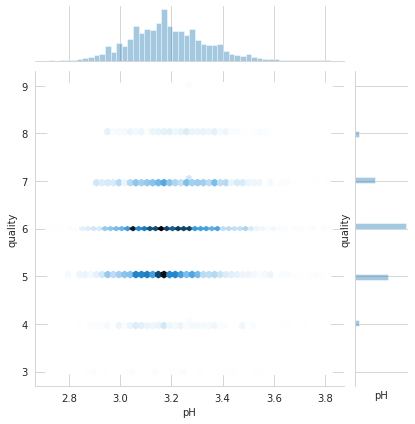

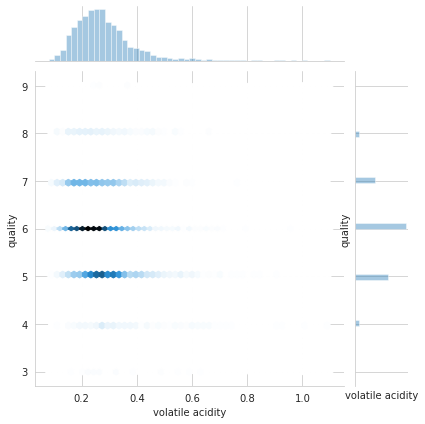

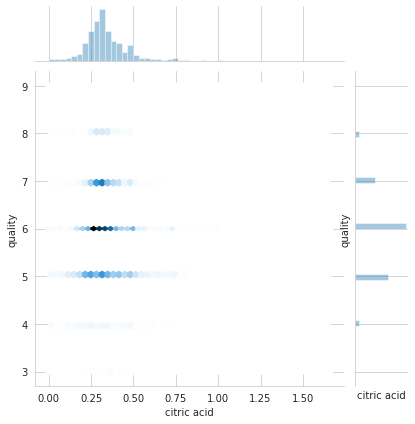

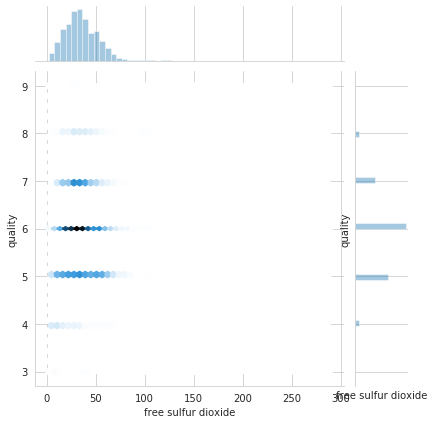

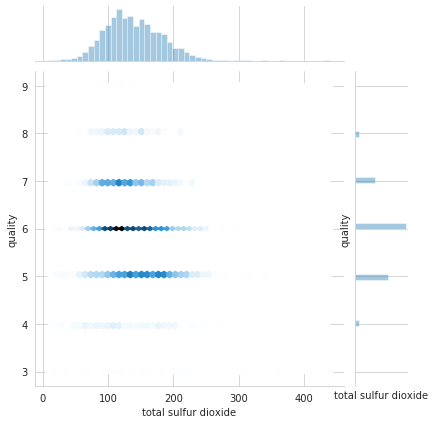

In [10]:
joint(wine, cols, 'quality', kind = 'hex')

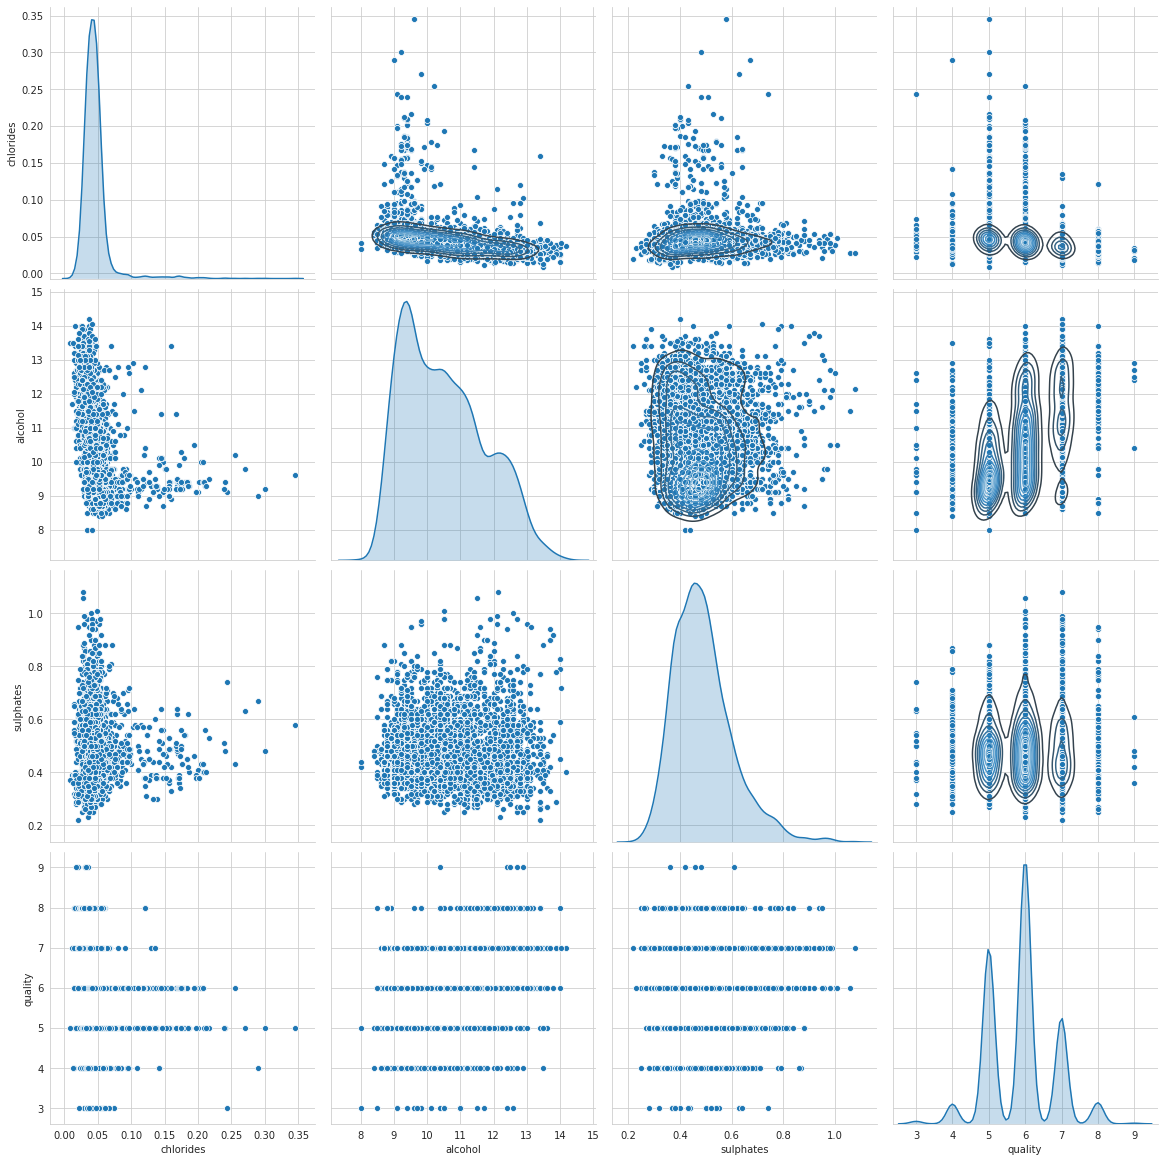

In [15]:
cols = ['chlorides','alcohol', 'sulphates', 'quality'] 
sns.pairplot(wine[cols], palette="Set2", diag_kind="kde", height=4).map_upper(sns.kdeplot, cmap="Blues_d")

In [20]:
cor = wine.corr()
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


[Text(0.5, 0, 'fixed acidity'),
 Text(1.5, 0, 'volatile acidity'),
 Text(2.5, 0, 'citric acid'),
 Text(3.5, 0, 'residual sugar'),
 Text(4.5, 0, 'chlorides'),
 Text(5.5, 0, 'free sulfur dioxide'),
 Text(6.5, 0, 'total sulfur dioxide'),
 Text(7.5, 0, 'density'),
 Text(8.5, 0, 'pH'),
 Text(9.5, 0, 'sulphates'),
 Text(10.5, 0, 'alcohol'),
 Text(11.5, 0, 'quality')]

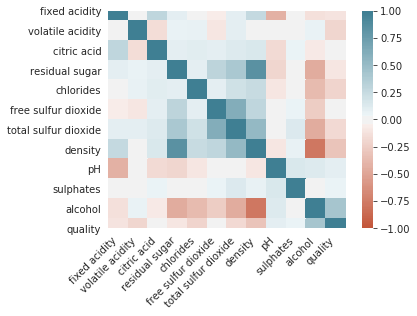

In [19]:
ax = sns.heatmap(
    cor, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(wine[['alcohol']],wine['quality'],test_size=0.30, random_state=42)

lr = LinearRegression()
lr.fit(X_train,y_train)

print("Score for train:",lr.score(X_train, y_train))
print("Score for test set:",lr.score(X_test, y_test))

Score for train: 0.18794694532771805
Score for test set: 0.19317977701698674


In [96]:
predicted = lr.predict(X_test)
predicted[0:3]

array([6.0127317 , 6.71554566, 6.40085284])

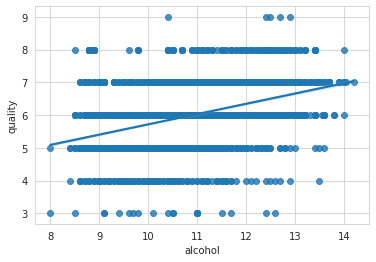

In [95]:
sns.regplot(x = 'alcohol', y = 'quality', data= wine)

A simple Linear model has a performance extremely poor. Let's see how the Ridge regression deals:

In [104]:
from sklearn.linear_model import Ridge

RidgeModel=Ridge(alpha=0.1)

RidgeModel.fit(X_train,y_train).score(X_test,y_test)

0.19317987451661023

As expected, Ridge Regression gives us poorly results too. Linear Models aren't good for this type of data. 